We will present to you in this notebook **parametric estimation** for mainly for MA process. We will be using *the mean square algorithm* for two main 
reasons. First, it's much more easier than phase-retrieval and it gives quite good results. 

# ER GRAPH 


In [24]:
#import of the necessary library 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
import networkx as nx 
import numpy.random as rd
from scipy.optimize import least_squares

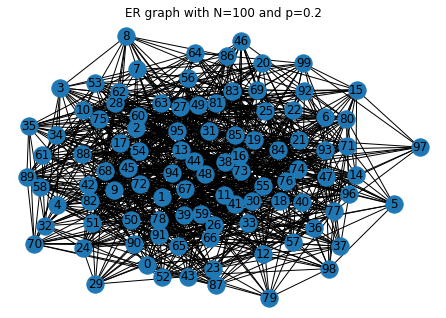

In [48]:
#ER graph 
G= nx.erdos_renyi_graph(100,0.2)
nx.draw(G, with_labels=True)     
plt.title('ER graph with N=100 and p=0.2')
plt.draw()

In [26]:
#the adjancency_matrix
S=nx.adjacency_matrix(G) #we define the shift matrix 
L=nx.linalg.laplacian_matrix(G)

In [27]:
S

<100x100 sparse matrix of type '<class 'numpy.longlong'>'
	with 2004 stored elements in Compressed Sparse Row format>

In [28]:
L

<100x100 sparse matrix of type '<class 'numpy.longlong'>'
	with 2104 stored elements in Compressed Sparse Row format>

# Filter construction

In [29]:
#degree of the filter 
L1=np.arange(1,7)
L1

array([1, 2, 3, 4, 5, 6])

In [30]:
#random coefficients of beta that depends of the order of the filter l
def beta_coef(l): 
  return rd.random_sample((l,))
beta_coef(5)

array([0.35714773, 0.34774357, 0.52374357, 0.5791659 , 0.66524297])

In [31]:
#let's treat this particulary case because we will face it in the future 
beta_coef(0)

array([], dtype=float64)

In [32]:
'''We define the power of a matrix because there are some problems with 
np.linalg.matrix_power when it has to deal with a sparse matrix''' 
def power_matrix(S,n): 
  #the matrix are supposed to be squared 
  m= 100 #number of nodes 
  M=np.identity(m)
  if n==0: 
    return M
  else:
    for i in range(n):
      M= M@S
  return np.array(M)

In [33]:
#filter is a function that generate the filter H of degree l
def filter(l): 
  b=beta_coef(l)
  H=np.zeros((100,100))
  for i in range(l): 
    H+= b[i]*power_matrix(L,i)
  return H

# Sans contrainte


In [34]:
def C_xb(b):
  m=len(b)
  M=np.zeros((100,100))
  for i in range(m):
    M+= b[i]*power_matrix(S,i)
  return M

In [35]:
def C_x(c):
  w= rd.normal(0,1,100)
  w=np.transpose(w)
  H=filter(c)
  x=H@w
  x=np.matrix(x)
  x_her = x.getH()
  C=x_her@x
  return C

In [36]:
def function_to_minimize(x): 
  m=len(x)
  F= C_xb(x)-C_x(m)
  
  return np.linalg.norm(F)


In [37]:
def main(l):
  res = least_squares(function_to_minimize , rd.random_sample(2*l-1,))
  return res.x

In [38]:
main(2)

array([0.687819  , 0.2755591 , 0.46063555])

In [39]:
P=[] #it will contain all the PSD 
Q=[]
for e in L1:
  b=main(e)
  C=C_x(e)
  v,V = np.linalg.eig(C)
  V_her = V.getH()
  Q.append(np.linalg.norm(np.diag(V_her@C@V))**2)
  d=np.diag(V_her@C_xb(b)@V) - np.diag(V_her@C@V)
  P.append(np.linalg.norm(d))
P_norm= P/np.linalg.norm(P)


In [40]:
P

[37.2032039040918,
 1630.5781914758102,
 1058025.945863758,
 13641131135.023207,
 1276001473266.1072,
 2951858513775034.5]

In [41]:
P_db = 10*np.log10(P)
Q_db= 10*np.log10(Q)

<function matplotlib.pyplot.show>

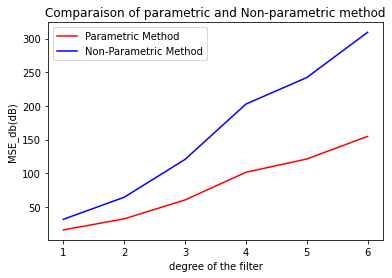

In [46]:
plt.plot(L1,P_db,color='r')
plt.plot(L1,Q_db,color='b')
plt.xlabel('degree of the filter')
plt.ylabel('MSE_db(dB)')
plt.title('Comparaison of parametric and Non-parametric method')
plt.legend(['Parametric Method','Non-Parametric Method'])
plt.show